In [35]:
!pip install catboost

In [36]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


In [37]:
df=pd.read_csv('C:/Users/Rugvedh/OneDrive/Desktop/mlproject/Data/data.csv')

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
X=df.drop(columns=['reading_score'],axis=1)

In [40]:
y=df['reading_score']

In [41]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_trans=StandardScaler()
oh_trans=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("OneHotencoder",oh_trans,cat_features),("Standarscaler",numeric_trans,num_features)
])

In [42]:
X=preprocessor.fit_transform(X)

In [43]:
X.shape

(1000, 19)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

EVALUATE MODEL

In [49]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [51]:
models={
"Linear Regression": LinearRegression(),
"Lasso": Lasso(),
"Ridge": Ridge(),
"K-Neighbors Regressor": KNeighborsRegressor(),
"Decision Tree": DecisionTreeRegressor(),
"Random Forest Regressor": RandomForestRegressor(),
"XGBRegressor": XGBRegressor(),
"CatBoosting Regressor": CatBoostRegressor (verbose=False),
"AdaBoost Regressor": AdaBoostRegressor() 
}
model_list=[]
r2_list=[]


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])



    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-------------------------------------------")

    print("\nModel performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)








Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8726
- Mean Absolute Error: 3.1213
- R2 Score: 0.9282
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 4.3105
- Mean Absolute Error: 3.4986
- R2 Score: 0.9179
Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051
Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8720
- Mean Absolute Error: 3.1221
- R2 Score: 0.9282
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4861
- R2 Score: 0.9182
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8049
- Mean Absolute Error: 3.7465
- R2 Score: 0.8895

In [53]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is {}".format(score))

Accuracy of the model is 91.78874972379887


Text(0, 0.5, 'predicted')

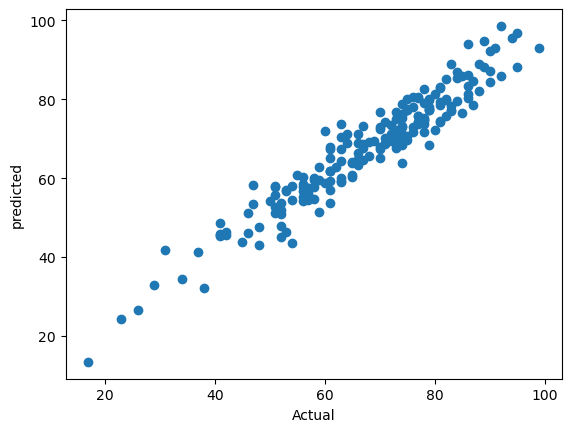

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='reading_score'>

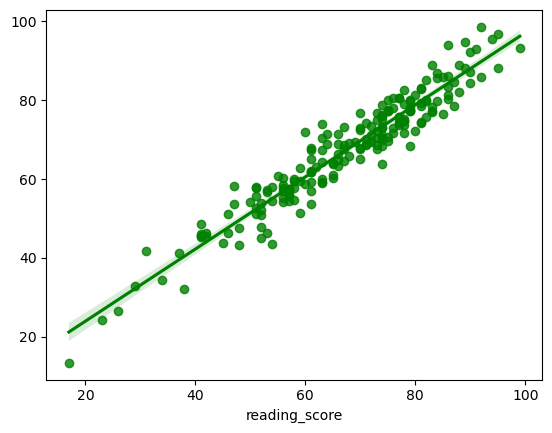

In [55]:
sns.regplot(x=y_test,y=y_pred,color='green')

In [57]:
pred_df=pd.DataFrame({'Actual_value':y_test,'predicted_value':y_pred,'Difference':y_test-y_pred})

In [58]:
pred_df

,Actual_value,predicted_value,Difference
521,86,86.18750,-0.18750
737,66,71.31250,-5.31250
740,73,72.09375,0.90625
660,77,75.84375,1.15625
411,83,78.34375,4.65625
...,...,...,...
408,57,56.31250,0.68750
332,56,54.28125,1.71875
208,81,78.43750,2.56250
613,77,74.34375,2.65625
